Import necessary libraries

In [12]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Question i(a)

In [2]:
def convolve2D(input_array, kernel):
    
    # Dimensions of input and kernel
    n = len(input_array)
    k = len(kernel)

    # Padding size
    padding_size = k // 2

    # Padding the input array
    padded_array = [[0 for _ in range(n + 2 * padding_size)] for _ in range(n + 2 * padding_size)]
    for i in range(n):
        for j in range(n):
            padded_array[i + padding_size][j + padding_size] = input_array[i][j]

    # Initialize the output array
    output = [[0 for _ in range(n)] for _ in range(n)]

    # Convolution operation
    for i in range(n):
        for j in range(n):
            sum = 0
            for di in range(k):
                for dj in range(k):
                    sum += padded_array[i + di][j + dj] * kernel[di][dj]
            output[i][j] = sum

    return output

# Example input array (3x3)
input_array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Example kernel (2x2)
kernel = [
    [-1, 0],
    [0, 1]
]

# Perform convolution
output_array = convolve2D(input_array, kernel)

# Print the output array
for row in output_array:
    print(' '.join(map(str, row)))

1 2 3
4 4 4
7 4 4


Convolution in 2D: This operation is widely used in image processing and involves sliding the kernel over the input array (image), multiplying          overlapping elements, and summing these products to form a new array (filtered image).

Purpose: It's used for various purposes like edge detection, blurring, sharpening, and more in image processing.

Padding: Padding is crucial for handling the edges of the input array. Without padding, the size of the output array would be smaller than the input array, or the edges of the input array would not be properly processed.

Kernel Size: The choice of kernel size and values significantly affects the result of the convolution. Different kernels can extract different features from the input array.

Question i(b)

In [4]:
# Define the convolution function
def convolve2D(input_array, kernel):
    n = len(input_array)
    k = len(kernel)

    # Padding size for 'same' convolution result
    padding_size = (k - 1) // 2

    # Padding the input array with zeros around the border
    padded_array = np.pad(input_array, [(padding_size, padding_size), (padding_size, padding_size)], mode='constant')

    # Initialize the output array with zeros
    output = np.zeros_like(input_array)

    # Perform convolution
    for i in range(n):
        for j in range(n):
            # Element-wise multiplication and sum
            output[i, j] = (kernel * padded_array[i:i+k, j:j+k]).sum()

    return output

# Load the image
im = Image.open('wings_of_liberty.png')

# Ensure the image is not too large, resize if it's larger than 200x200 pixels
if im.size[0] > 200 or im.size[1] > 200:
    im = im.resize((200, 200))

# Convert the image to a NumPy array
rgb = np.array(im.convert('RGB'))

# Extract the red channel
r_channel = rgb[:,:,0]

# Define the kernels
kernel1 = np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]])

kernel2 = np.array([[ 0, -1,  0],
                    [-1,  8, -1],
                    [ 0, -1,  0]])

# Perform convolution with kernel1
output_array1 = convolve2D(r_channel, kernel1)

# Perform convolution with kernel2
output_array2 = convolve2D(r_channel, kernel2)

# Convert the output arrays to uint8 to display as images
output_image1 = Image.fromarray(np.uint8(output_array1))
output_image2 = Image.fromarray(np.uint8(output_array2))

# Save the output images
output_image1.save('wings_of_liberty_convolved_kernel1.png')
output_image2.save('wings_of_liberty_convolved_kernel2.png')

Load the Image: The image wings_of_liberty.jpg is loaded from the file system. If the image is larger than 200x200 pixels, it is resized to ensure the convolution operation is not too computationally expensive.

Convert to NumPy Array: The image is converted to a NumPy array to facilitate easy manipulation. Each pixel in an image has three channels (Red, Green, Blue), and these are represented in the array.

Extract Red Channel: The script extracts only the red channel of the image because the convolution is being applied to a single channel for demonstration purposes.

Define Kernels: Two kernels are defined (kernel1 and kernel2). These are matrices that determine the nature of the convolution operation. kernel1 is a sharpening kernel, and kernel2 is an edge detection kernel.

Question ii(a)

Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week8.py" -OutFile "week8.py"

1.  Conv2D Layer:
    1. Kernel size: 3x3
    2. Output channels (filters): 16
    3. Padding: 'same' (keeps the spatial dimensions of the output the same as the input)
    4. Activation function: ReLU (Rectified Linear Unit)
    5. This layer does not alter the spatial dimensions due to 'same' padding and a stride of 1 (default).
2.  Conv2D Layer:
    1. Kernel size: 3x3
    2. Output channels (filters): 16
    3. Strides: 2x2 (reduces the spatial dimensions of the output)
    4. Padding: 'same'
    5. Activation function: ReLU
    6. This layer reduces the spatial dimensions by a factor of 2 due to the stride.
3.  Conv2D Layer:
    1. Kernel size: 3x3
    2. Output channels (filters): 32
    3. Padding: 'same'
    4. Activation function: ReLU
    5. Similar to the first layer, it does not change the spatial dimensions.
4.  Conv2D Layer:
    1. Kernel size: 3x3
    2. Output channels (filters): 32
    3. Strides: 2x2
    4. Padding: 'same'
    5. Activation function: ReLU
    6. This layer again reduces the spatial dimensions by a factor of 2 due to the stride.
5.  Dropout Layer:
    1. Dropout rate: 0.5 (50% of the inputs will be randomly set to zero)
6.  Flatten Layer:
    1. Flattens the input. Does not affect the number of channels but converts the multi-dimensional input into a single-dimensional array.
7.  Dense Layer:
    1. Units: 10 (corresponding to the number of classes)
    2. Activation function: Softmax (used for multi-class classification)
    3. Kernel regularizer: L1 regularization with a factor of 0.0001 (adds a penalty equal to the absolute value of the magnitude of coefficients)

Question ii(b) -- i 

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


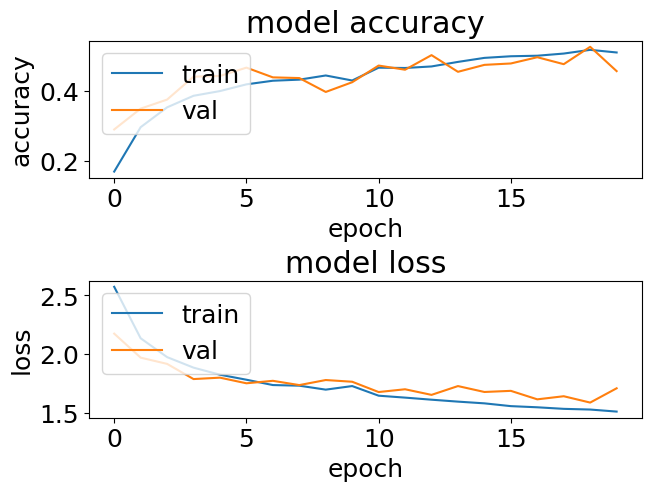

157/157 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.46      0.75      0.57       505
           1       0.81      0.55      0.65       460
           2       0.33      0.71      0.45       519
           3       0.54      0.28      0.37       486
           4       0.55      0.23      0.32       519
           5       0.46      0.61      0.52       488
           6       0.62      0.53      0.57       518
           7       0.68      0.53      0.60       486
           8       0.71      0.41      0.52       520
           9       0.64      0.65      0.64       498

    accuracy                           0.53      4999
   macro avg       0.58      0.53      0.52      4999
weighted avg       0.58      0.53      0.52      4999

[[379   7  41   6   7   7   4   8  33  13]
 [ 47 252  18   3   1   8  15   8  26  82]
 [ 40   5 370   8  12  39  19  17   4   5]
 [ 13   0 104 137  20 130  48  14   2  18]
 [ 51   2 221 

In [10]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000												#change in here to modify the data amount of training
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001))) #change in here to modify the L1 weight parameter
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))


1. Total parameters: The model has 37,146 total parameters.
2. Layer with the most parameters: The 'dense' layer has the most parameters, totaling 20,490. This is typical for densely connected layers, as they contain a weight for every connection between the neurons in the previous layer and each neuron in the dense layer. The formula for calculating the number of parameters in a dense layer is (input_features * neurons) + neurons for weights and biases respectively. Since the 'flatten' layer outputs 2048 features and the 'dense' layer has 10 output neurons (for the 10 classes), the calculation is (2048 * 10) + 10 = 20490.

3. Regarding the performance of the model:
    1. The accuracy on the validation (test) data is approximately 49.4% by the end of the training (20th epoch), which is close to the expected 48% mentioned in the question.
    2. When comparing the performance on the test data with the training data, the model achieves a higher accuracy on the training data (about 58.3%) by the end of the training epochs. This discrepancy suggests that the model is overfitting to the training data, which means it has learned specific patterns in the training data that do not generalize well to the unseen test data.

comparing to baseline (dummy)

In [5]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Flatten the output labels
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

# Initialize the DummyClassifier to predict the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the DummyClassifier
dummy_clf.fit(x_train, y_train_flat)

# Make predictions on the training data
y_pred_train_dummy = dummy_clf.predict(x_train)

# Make predictions on the test data
y_pred_test_dummy = dummy_clf.predict(x_test)

# Generate and print accuracy metrics for the training data
print("Dummy Classifier - Training Data")
print(classification_report(y_train_flat, y_pred_train_dummy, zero_division=0))
print(confusion_matrix(y_train_flat, y_pred_train_dummy))

# Generate and print accuracy metrics for the test data
print("Dummy Classifier - Test Data")
print(classification_report(y_test_flat, y_pred_test_dummy, zero_division=0))
print(confusion_matrix(y_test_flat, y_pred_test_dummy))


Dummy Classifier - Training Data
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      5000
           1       0.00      0.00      0.00      5000
           2       0.00      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.00      0.00      0.00      5000
           5       0.00      0.00      0.00      5000
           6       0.00      0.00      0.00      5000
           7       0.00      0.00      0.00      5000
           8       0.00      0.00      0.00      5000
           9       0.00      0.00      0.00      5000

    accuracy                           0.10     50000
   macro avg       0.01      0.10      0.02     50000
weighted avg       0.01      0.10      0.02     50000

[[5000    0    0    0    0    0    0    0    0    0]
 [5000    0    0    0    0    0    0    0    0    0]
 [5000    0    0    0    0    0    0    0    0    0]
 [5000    0    0    0    0    0    0    0    0   

1. I trained a DummyClassifier model with a strategy to always predict the most common label in the dataset, which will serve as a good baseline to compare the effectiveness of CNN model.
2. Accuracy: The accuracy of the DummyClassifier is equal to the proportion of the most common class in the dataset which is only 10% of accuracy when the most common class represents 10% of the data only. 
3. Conclusion: This indicates that CNN is learning from the data. 

Question ii(b) -- ii 

1. The plot of model accuracy and model loss during the training process provides insights into whether a model is learning effectively and generalizing well to unseen data. Here are the key diagnostics regarding overfitting and underfitting that can be deduced from such plots:

2. Overfitting:
    1. The training accuracy continues to increase and becomes very high, while the validation accuracy plateaus or even decreases, this suggests that the model is overfitting.
    2. The training loss continues to decrease and becomes very low, while the validation loss decreases up to a point and then starts increasing, this is a classic sign of overfitting.
    3. Overfitting implies that the model has learned the training data too well, including noise and details that do not generalize to new data.
    4. According to the plot, the model has the possibility of over-fitting of the model

3. Underfitting:
    1. If both the training and validation accuracies are low, or if the training accuracy is much higher than the validation accuracy but both are still low, the model may be underfitting.
    2. If both the training and validation losses are high, or if they decrease very slowly, this might suggest that the model is not learning enough from the training data.
    3. Underfitting implies that the model is too simple to capture the underlying pattern of the data.
    4. According to the plot, the model seems don't have the possibility of the under-fitting of the model.

Question ii(b) -- iii

In [ ]:
#Data Amount                     Train Accuracy                      Validate Accuracy                       Running Time                       
#5k                              0.5835                              0.5020                                  43 seconds
#10k                             0.6026                              0.5790                                  83 seconds
#20k                             0.6277                              0.6085                                  147 seconds
#40k                             0.6716                              0.6760                                  311 seconds

1. Training Time: As the amount of data increases, the training time also increases. This is expected because there are more samples to process in each epoch. The training time does not increase linearly, likely due to the overhead of each epoch's startup and finishing operations that do not scale with the amount of data.
2. Training Accuracy: There is a clear trend that as the amount of training data increases, the training accuracy also increases. This is a common observation since having more data typically allows the model to learn more robust features and generalizes better. The increase from 5k to 40k results in an improvement of roughly 9%, which is significant.
3. Validation Accuracy: Similar to the training accuracy, the validation accuracy increases with the amount of training data. However, the validation accuracy is generally lower than the training accuracy, indicating the model is overfitting to some extent. The largest increase in validation accuracy is observed between 10k and 20k samples, suggesting that this is where the model benefits most from additional data in terms of generalization.
4. Overfitting: There is a gap between training and validation accuracy in all scenarios, which indicates overfitting. However, this gap decreases as more data is used, suggesting that the model is starting to generalize better with more data. The overfitting is less pronounced at 40k samples compared to 5k samples.

Question ii(b) --iv

In [ ]:
#L1                     Train Accuracy                      Validate Accuracy                       Running Time                       
#0.0001                 0.5835                              0.5020                                  43 seconds
#0.001                  0.5192                              0.5280                                  42 seconds
#0.01                   0.4248                              0.4640                                  44 seconds
#0                      0.5746                              0.4920                                  41 seconds
#1                      0.1056                              0.0880                                  41 seconds
#10                     0.1076                              0.0900                                  42 seconds

1. L1 Regularization: As the L1 regularization increases from 0.0001 to 10, both training and validation accuracies generally decrease. This is expected as stronger L1 penalties can lead to more features being considered irrelevant, resulting in a simpler model that may underfit the training data.

2. Optimal Regularization: A lower L1 value of 0.0001 yields the best training and validation accuracies (58.35% and 52.20%, respectively), indicating that a small amount of regularization helps prevent overfitting while still allowing the model to learn effectively from the data.

3. Over-Regularization: High L1 values (1 and 10) drastically reduce accuracies, suggesting over-regularization. In these cases, the model is too simple and cannot capture the underlying patterns in the data, leading to underfitting.

4. Running Time: The running time does not significantly vary with different L1 values, staying around 42-44 seconds, implying that the computational complexity is not heavily affected by L1 regularization.

Question c(i)

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_5 (Flat

INFO:tensorflow:Assets written to: cifar.model\assets


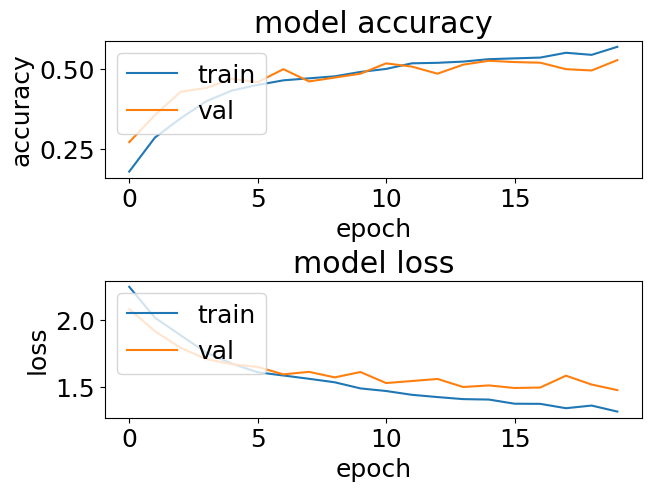

157/157 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       505
           1       0.76      0.65      0.70       460
           2       0.55      0.46      0.50       519
           3       0.55      0.41      0.47       486
           4       0.51      0.54      0.52       519
           5       0.52      0.62      0.57       488
           6       0.64      0.68      0.66       518
           7       0.55      0.73      0.63       486
           8       0.69      0.71      0.70       520
           9       0.68      0.65      0.67       498

    accuracy                           0.61      4999
   macro avg       0.61      0.61      0.60      4999
weighted avg       0.61      0.61      0.60      4999

[[310  16  27   7  11   8   5  28  72  21]
 [ 15 298   5   3   6   4  20  13  36  60]
 [ 24   6 238  28  81  43  38  43  11   7]
 [  6   3  31 199  39  97  52  45   5   9]
 [ 18   3  46 

In [11]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000												#change in here to modify the data amount of training
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D((2,2)))  # Add max-pooling layer here
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2)))  # Add max-pooling layer here
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))  # Softmax output layer unchanged
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))


1. Train Accuracy: The modified ConvNet with max pooling has a slightly lower training accuracy (56.72%) compared to the original ConvNet (58.35%). This small drop in training accuracy could be due to the max pooling operation, which might be causing some loss of feature information that was otherwise captured by the strided convolutions in the original ConvNet.

2. Validation Accuracy: The validation accuracy has improved from 50.20% to 52.60% with the introduction of max pooling. This indicates that the features retained after max pooling may be more generalizable, helping the model perform better on unseen data. Max pooling is known to provide robustness to input variations and noise, which can be beneficial for the generalization capability of the model.

3. Running Time: The training time has decreased from 43 seconds to 41 seconds with max pooling. Max pooling layers reduce the spatial dimensions of the feature maps, which can decrease the computational burden on subsequent layers. This reduction in computation can lead to faster training times. Despite the additional operation of max pooling, the reduced size of the feature maps seems to have a more significant effect on reducing the overall training time.

4. In summary, replacing strided convolutions with max pooling layers slightly reduced the training accuracy, but improved validation accuracy and decreased the training time. 

Question d

1. Prediction Performance: Adding more layers (making the network deeper) can potentially increase the model's ability to learn more complex features from the data. This could lead to improved prediction performance if the additional layers are able to capture more nuanced patterns within the input space.

2. Overfitting/Underfitting: Deeper networks are at a higher risk of overfitting, especially if not regularized properly or if the network is too complex relative to the amount of available training data. Regularization techniques, like the L1 regularization mentioned, can help mitigate this by penalizing the magnitude of the weights. On the other hand, if the network is too deep and thin without sufficient training data, it might not be able to learn effectively, leading to underfitting.

3. Amount of Training Data Needed: Deeper networks typically require more data to train effectively because they have the capacity to model more complex relationships in the data. Without enough data, the network may not perform well.

4. Training Time: Generally, deeper networks take longer to train because there are more layers through which data must propagate and more parameters to update during backpropagation. However, since this network is also thinner (fewer filters per layer), the total number of parameters might not be significantly higher than a shallower, wider network, which could mitigate some of the increased computational cost.

x_train shape: (5000, 32, 32, 3)
Epoch 1/20
79/79 [==============================] - 21s 242ms/step - loss: 2.2871 - accuracy: 0.2800 - val_loss: 2.7385 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 2/20
79/79 [==============================] - 19s 236ms/step - loss: 1.7965 - accuracy: 0.3712 - val_loss: 3.1132 - val_accuracy: 0.1184 - lr: 0.0010
Epoch 3/20
79/79 [==============================] - 18s 226ms/step - loss: 1.6699 - accuracy: 0.4068 - val_loss: 3.5181 - val_accuracy: 0.1058 - lr: 0.0010
Epoch 4/20
79/79 [==============================] - 16s 206ms/step - loss: 1.5843 - accuracy: 0.4412 - val_loss: 2.9488 - val_accuracy: 0.1726 - lr: 0.0010
Epoch 5/20
79/79 [==============================] - 17s 219ms/step - loss: 1.4960 - accuracy: 0.4604 - val_loss: 2.2198 - val_accuracy: 0.2842 - lr: 2.0000e-04
Epoch 6/20
79/79 [==============================] - 18s 223ms/step - loss: 1.4358 - accuracy: 0.4864 - val_loss: 1.6472 - val_accuracy: 0.4238 - lr: 2.0000e-04
Epoch 7/20
79/79 [=====

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


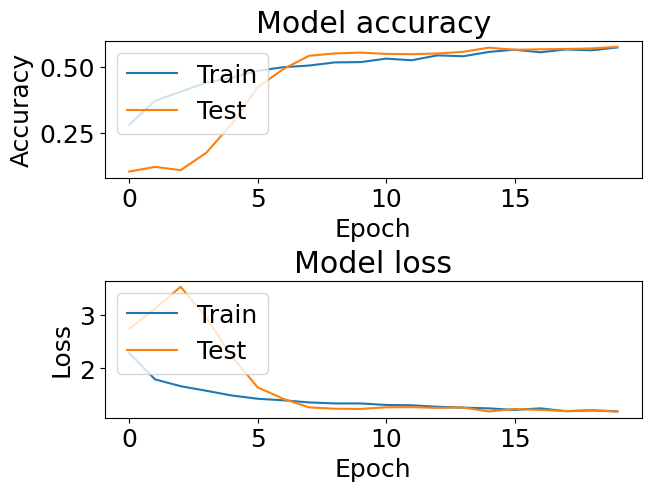

Test loss: 1.1972814798355103
Test accuracy: 0.5785999894142151


In [14]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Use a smaller subset for faster training in this example
n = 5000
x_train = x_train[:n]
y_train = y_train[:n]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

# Define the model
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# Set callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[reduce_lr, early_stop]
)

# Save the model
model.save("cifar10_optimized_model.h5")

# Plot training & validation accuracy values
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])